# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)" data-toc-modified-id="19/02/2018---Аномалии,-работа-с-признаками,-пайплайны-(практика)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)</a></div><div class="lev1 toc-item"><a href="#Создание-пайплайна-и-генерация-признаков" data-toc-modified-id="Создание-пайплайна-и-генерация-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание пайплайна и генерация признаков</a></div><div class="lev2 toc-item"><a href="#Посмотрим-на-данные" data-toc-modified-id="Посмотрим-на-данные-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим на данные</a></div><div class="lev2 toc-item"><a href="#Генерим-признаки" data-toc-modified-id="Генерим-признаки-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Генерим признаки</a></div><div class="lev2 toc-item"><a href="#Подбор-гипер-параметров" data-toc-modified-id="Подбор-гипер-параметров-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подбор гипер-параметров</a></div><div class="lev3 toc-item"><a href="#Pipeline" data-toc-modified-id="Pipeline-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Pipeline</a></div><div class="lev3 toc-item"><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Подбор гиперпараметров</a></div><div class="lev4 toc-item"><a href="#Grid-search" data-toc-modified-id="Grid-search-2321"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Grid search</a></div><div class="lev4 toc-item"><a href="#Random-Search" data-toc-modified-id="Random-Search-2322"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Random Search</a></div><div class="lev3 toc-item"><a href="#HyperOpt" data-toc-modified-id="HyperOpt-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>HyperOpt</a></div><div class="lev2 toc-item"><a href="#Ваш-черед" data-toc-modified-id="Ваш-черед-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Ваш черед</a></div><div class="lev3 toc-item"><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Новые признаки</a></div><div class="lev2 toc-item"><a href="#Поиск-гиперпараметров" data-toc-modified-id="Поиск-гиперпараметров-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск гиперпараметров</a></div>

# Skillfactory - Практический Machine Learning
## 19/02/2018 - Аномалии, работа с признаками, пайплайны (практика)

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Создание пайплайна и генерация признаков
<center>Шестаков Андрей</center>

В этом задании мы рассмотрим данные с предыдущего Sberbank Data Science Contest. К сожалению найти страницу с конкурсом уже не получается.

Одной из задач была опредление пола владельца карты по его транзакциям на карте. Зачем это нужно - одному сберу известно, но эта задача была хороша тем, что в ней можно нагенерировать много разных признаков

Есть такая [презентация](https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf) с предварительным анализом данных и идеями про признаки

Нам понадобятся файлы `customers_gender_train.csv`, `transactions.tsv.gz`, `mcc_types.tsv` и `trans_types.tsv`.

## Посмотрим на данные

Это метки ответов

In [2]:
df_gender = pd.read_csv('data/customers_gender_train.csv')
df_gender.head()

,customer_id,gender
0,75562265,0
1,10928546,1
2,69348468,1
3,84816985,1
4,61009479,0


Это сами транзакции (отрицательные транзакции - списывание, положительные - зачисление на счет)

In [165]:
df_transactions = pd.read_csv('data/transactions.csv.gz')
df_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


Далее, расшифровки кодов [mcc](https://ru.wikipedia.org/wiki/Merchant_Category_Code) и транзакций

In [198]:
#df_tr = pd.read_csv('data/tr_types.csv', sep=';')
df_tr
#[df_tr['tr_type'] == 4814]

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...
5,4010,Плата за получение наличных в АТМ Сбербанка
6,4011,Плата за получение наличных в АТМ Сбербанка (в...
7,4020,Плата за получение наличных через POS в Сбербанке
8,4021,Плата за получение наличных через POS в Сберба...
9,4030,Плата за взнос наличных через АТМ (в своем тер...


In [5]:
df_mcc = pd.read_csv('data/tr_mcc_codes.csv', sep=';')
df_mcc.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


Первое что мы видем - это странная дата и суммы в транзакциях. 

В принципе, посмотрев на исходное распределение "относительных" дат по какой-нибудь гендерной группы mcc, становится примерно понятно, что за даты закодированы.

Ну а суммы транзакций организаторы просто умножили на $\pi^{\exp}$ =)

Преобразование будет проделано ниже, но при желании, можете сами со всем разобраться.

In [6]:
from pandas import Timestamp, DateOffset

In [7]:
def preproc_transactions(df_transactions):
    sec_per_day = 86400
    sec_per_hour = 3600
    
    start_date = 1420070400 - 154 * sec_per_day - 3 * sec_per_hour
    
    df_transactions.loc[:, 'day'] = df_transactions.tr_datetime\
                                               .str.split(' ')\
                                               .str.get(0)\
                                               .astype(int)
    df_transactions.loc[:, 'time_raw'] = df_transactions.tr_datetime\
                                                    .str.split(' ')\
                                                    .str.get(1)

    # set temp dt
    df_transactions.loc[:, 'dt_temp'] = pd.to_datetime(df_transactions.loc[:, 'time_raw'], 
                                                    format='%H:%M:%S')\
                                        + DateOffset(years=115)
    
    df_transactions = df_transactions.assign(dt = lambda x: x.dt_temp.astype(np.int64) // 10**9
                                             + (x.day - 153) * sec_per_day)\
                                     .assign(weekday = lambda x: ((x.day + 4) % 7 + 1))
        
    df_transactions.loc[:, 'datetime'] = pd.to_datetime(df_transactions.dt, unit='s')
    df_transactions.loc[:, 'date'] = df_transactions.loc[:, 'datetime'].dt.strftime('%Y-%m-%d')
    df_transactions.loc[:, 'hour'] = df_transactions.loc[:, 'datetime'].dt.strftime('%H')
    
    df_transactions = df_transactions.drop(['dt_temp', 'time_raw', 'tr_datetime'], axis=1)
    
    df_transactions.loc[:, 'amount'] = np.round(df_transactions.loc[:, 'amount']/(np.pi**np.exp(1)))
            
    return df_transactions

In [168]:
df_transactions = df_transactions.pipe(preproc_transactions)

In [169]:
df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15


## Генерим признаки

В качестве базовых признаков, можно взять, например, 
* количество (доля) транзакций по каждому mcc_code
* количество (доля) транзакций в разные промежутки времени

In [12]:
def gen_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')
        
    return df_features

In [75]:
t= df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

In [76]:
t.head()

hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
customer_id,,,,,,,,,,,,,,,,,,,,,
6815,0,1,1,0,0,0,1,2,4,20,...,36,18,9,9,7,6,7,2,0,0
22899,2,6,6,3,2,1,1,0,1,20,...,16,18,19,7,13,12,11,4,5,0
27914,2,0,0,1,1,2,2,6,16,5,...,14,2,13,6,3,2,0,0,0,0
28753,67,1,9,7,15,21,22,21,18,10,...,8,3,1,2,0,0,0,1,0,0
31385,11,0,0,0,0,0,0,16,16,13,...,14,16,19,16,23,18,18,40,26,3


In [13]:
df_features = df_gender.pipe(gen_features, df_transactions)

In [14]:
label = 'gender'
idx_features = df_features.columns != label

In [72]:
df_features.columns.T

Index(['customer_id', 'gender', 'mcc_742_count', 'mcc_1711_count',
       'mcc_1731_count', 'mcc_1799_count', 'mcc_2741_count', 'mcc_3000_count',
       'mcc_3351_count', 'mcc_3501_count',
       ...
       'mcc_8999_count', 'mcc_9211_count', 'mcc_9222_count', 'mcc_9311_count',
       'mcc_9399_count', 'mcc_9402_count', 'morning', 'day', 'evening',
       'night'],
      dtype='object', length=190)

In [16]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

## Подбор гипер-параметров

### Pipeline

Сделаем простой sklearn пайплайн, который делает следующее:
* Нормирует признаки через StandartScaler
* Запускает лог-регрессию

In [17]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

In [18]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

In [19]:
RND_SEED = 123

### Подбор гиперпараметров

До этого мы исключительно смотрели, как влияет на меру качества какой-то один параметр при фиксированных остальных. Пришло время перебирать все что можно!

В базовом варианте, это делается либо через `Grid Search`, либо через `Random Search`. Какие ключевые отличия?
* В `Grid Search` вы в явнов виде задаете возможные значения каждого гипер-параметра, который хотите варьировать. Соответственно, выполняется **полный** перебор всех возможных комбинаций
* В `Random Search` допукается указание распределения параметров, например "равномерно, на интервале от 0 до 100" или "нормальное распределение с таким-то цетром и такой-то дисперсией. Соответственно, так как это случайный перебор, то **вы** просто **задаете** количество случайных комбинаций, которые будут проверяться

Может показаться, что делать случайный перебор опасно - там же все случайно. Но на практике именно он и искользуется в силу двух причин
* Полный перебор большого количества комбинаций очень долгий
* Мы можем просто пропустить значения гиперпараметра, которые сильно влияют на метрику качества (см рисунок снизу)

<img src='img/gridsearch.jpeg'>

Попробуем оба варианта

#### Grid search

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [22]:
np.logspace(-5, 3, 10)

array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03])

In [21]:
# Задаем значения параметров, которые хотим проверить

# в данном случае "__" разленяет название гиперпараметра от этапа, где этот гиперпараметр используется
# если у нас будет не пайплайн, а просто один классификатор, то разделитель указывать не нужно
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': np.logspace(-5, 3, 10)
}

print(param_grid)

# Задаем схему кросс-валидации
cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)

{'clf__C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]), 'clf__penalty': ['l1', 'l2'], 'scaler__with_mean': [False, True], 'clf__random_state': [123]}


In [23]:
grid_searcher = GridSearchCV(model, param_grid, 
                             scoring='roc_auc', 
                             n_jobs=-1, cv=cv, 
                             verbose=2)

grid_searcher.fit(X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.1s
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=T

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s


[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.2s
[CV] clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV] clf__C=1e-05, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1e-05, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV] clf__C=1e-05, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV]  clf__C=1e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV] c

[CV]  clf__C=0.0005994842503189409, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.3s
[CV] clf__C=0.0005994842503189409, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.0005994842503189409, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV]  clf__C=0.0005994842503189409, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.2s
[CV]  clf__C=0.0005994842503189409, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.2s
[CV] clf__C=0.0005994842503189409, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.0005994842503189409, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV] clf__C=0.0005994842503189409, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.0005994842503189409, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.2s
[CV]  clf__C=0

[CV]  clf__C=0.004641588833612777, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   0.7s
[CV] clf__C=0.03593813663804626, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=0.03593813663804626, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   0.7s
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   0.7s
[CV]  clf__C=0.004641588833612777, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   0.9s
[CV] clf__C=0.03593813663804626, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.03593813663804626, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.2s
[CV] clf__C=0.03593813663804626, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=0.03593813663804626, clf__penal

[CV] clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=2.154434690031882, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   1.0s
[CV]  clf__C=2.154434690031882, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   1.3s
[CV] clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=2.154434690031882, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   1.2s
[CV]  clf__C=2.154434690031882, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.8s
[CV]  clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.8s
[CV] clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.8s
[CV]  clf__C=2.154434690031882, clf__penalty=l1, s

[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    9.1s


[CV]  clf__C=2.154434690031882, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   1.4s
[CV] clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=16.681005372000556, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=16.681005372000556, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=16.681005372000556, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=16.681005372000556, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=16.681005372000556, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.9s
[CV] clf__C=16.681005372000556, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=0.2782559402207126, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total

[CV] clf__C=1000.0, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=1000.0, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=2.154434690031882, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   3.9s
[CV] clf__C=1000.0, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   1.1s
[CV] clf__C=1000.0, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   1.1s
[CV] clf__C=1000.0, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=1000.0, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=129.15496650148827, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.9s
[CV] clf__C=1000.0, clf__penalty=l1, scaler__w

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   17.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': array([1.00000e-05, 7.74264e-05, 5.99484e-04, 4.64159e-03, 3.59381e-02,
       2.78256e-01, 2.15443e+00, 1.66810e+01, 1.29155e+02, 1.00000e+03]), 'clf__penalty': ['l1', 'l2'], 'scaler__with_mean': [False, True], 'clf__random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

На выходе в grid_searcher можно посмотреть, какая комбинация оказалась наилучшей, сколько занял рачет и напрямую достать лучшую модель.

In [24]:
grid_searcher.best_params_

{'clf__C': 0.03593813663804626,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': True}

In [25]:
grid_searcher.best_score_

0.8333700479549012

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
results = pd.DataFrame(grid_searcher.cv_results_)

In [29]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.143502,0.024537,0.500000,0.500000,1e-05,l1,123,False,"{'scaler__with_mean': False, 'clf__penalty': '...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.046517,0.007063,0.000000,0.000000
1,0.265895,0.027446,0.500000,0.500000,1e-05,l1,123,True,"{'scaler__with_mean': True, 'clf__penalty': 'l...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.027609,0.012516,0.000000,0.000000
2,0.247113,0.038316,0.793321,0.799113,1e-05,l2,123,False,"{'scaler__with_mean': False, 'clf__penalty': '...",34,...,0.790877,0.800359,0.790852,0.796988,0.796070,0.800062,0.086167,0.010311,0.006108,0.001423
3,0.395143,0.049370,0.797828,0.804185,1e-05,l2,123,True,"{'scaler__with_mean': True, 'clf__penalty': 'l...",33,...,0.805513,0.808778,0.784124,0.799038,0.805717,0.803717,0.058173,0.010119,0.010103,0.004604
4,0.207953,0.027488,0.500000,0.500000,7.74264e-05,l1,123,False,"{'scaler__with_mean': False, 'clf__penalty': '...",36,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.067238,0.010231,0.000000,0.000000


In [30]:
best_model = grid_searcher.best_estimator_

#### Random Search

In [31]:
from scipy.stats import randint as sp_randint
from scipy.stats import lognorm as sp_lognorm

In [41]:
sp_lognorm(4).rvs()

0.15099316113183459

In [42]:
# Задаем значения параметров, которые хотим проверить
# Теперь с распределениями
param_grid = {
    'scaler__with_mean': [False, True],
    'clf__penalty': ['l1', 'l2'],
    'clf__random_state': [RND_SEED],
    'clf__C': sp_lognorm(4)
}

print(param_grid)

{'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fecd14d1240>, 'clf__penalty': ['l1', 'l2'], 'scaler__with_mean': [False, True], 'clf__random_state': [123]}


In [43]:
# Рассмотрим 20 случайных комбинаций
random_searcher = RandomizedSearchCV(model, param_grid, n_iter=20, 
                                     random_state=RND_SEED,
                                     scoring='roc_auc', 
                                     n_jobs=-1, cv=cv, 
                                     verbose=2)

random_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV] clf__C=54.02148221946703, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.2s
[CV] clf__C=54.02148221946703, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.2s
[CV] clf__C=54.0214822194

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s


[CV] clf__C=54.02148221946703, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=0.013003686130638284, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.3s
[CV] clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=739.3313143249965, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=739.3313143249965, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV] clf__C=739.3313143249965, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=54.02148

[CV] clf__C=4.686779143259426, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.17984668960629735, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   2.7s
[CV] clf__C=4.686779143259426, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.17984668960629735, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   2.5s
[CV] clf__C=4.686779143259426, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   3.8s
[CV] clf__C=4.686779143259426, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=0.09882536189042468, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   3.8s
[CV]  clf__C=4.686779143259426, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.4s
[CV] clf__C=0.023675003937163, clf__penalty=l1, scaler__w

[CV] clf__C=40.847667765581036, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123 
[CV]  clf__C=1.3751585631540372e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.3s
[CV]  clf__C=0.359702678393066, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   0.9s
[CV]  clf__C=1.3751585631540372e-05, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123, total=   0.6s
[CV] clf__C=0.49930271136349663, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=40.847667765581036, clf__penalty=l1, scaler__with_mean=False, clf__random_state=123, total=   0.5s
[CV]  clf__C=55.49070845521297, clf__penalty=l2, scaler__with_mean=True, clf__random_state=123, total=   4.5s
[CV]  clf__C=0.359702678393066, clf__penalty=l2, scaler__with_mean=False, clf__random_state=123, total=   1.0s
[CV] clf__C=0.49930271136349663, clf__penalty=l1, scaler__with_mean=True, clf__random_state=123 
[CV]  clf__C=40.847667765581036, cl

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fecd14d1240>, 'clf__penalty': ['l1', 'l2'], 'scaler__with_mean': [False, True], 'clf__random_state': [123]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

Аналогичный выхлоп

In [44]:
random_searcher.best_params_

{'clf__C': 0.066168907176401,
 'clf__penalty': 'l1',
 'clf__random_state': 123,
 'scaler__with_mean': False}

In [45]:
random_searcher.best_score_

0.8331573859251894

In [46]:
results = pd.DataFrame(random_searcher.cv_results_)

In [47]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_clf__C,param_clf__penalty,param_clf__random_state,param_scaler__with_mean,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.193225,0.022633,0.829825,0.834829,0.0130037,l1,123,False,"{'scaler__with_mean': False, 'clf__penalty': '...",10,...,0.828339,0.835108,0.826309,0.835922,0.838233,0.833295,0.061083,0.005048,0.004286,0.000864
1,0.488568,0.032790,0.829800,0.849569,54.0215,l1,123,True,"{'scaler__with_mean': True, 'clf__penalty': 'l...",14,...,0.828253,0.849283,0.826534,0.850176,0.836140,0.848428,0.098388,0.008753,0.003311,0.000720
2,3.997469,0.042428,0.832553,0.848429,0.0988254,l1,123,True,"{'scaler__with_mean': True, 'clf__penalty': 'l...",3,...,0.830869,0.847940,0.829224,0.849445,0.838956,0.847167,0.254633,0.013707,0.003361,0.000820
3,0.891117,0.043904,0.829790,0.849568,739.331,l1,123,True,"{'scaler__with_mean': True, 'clf__penalty': 'l...",15,...,0.828243,0.849282,0.826525,0.850174,0.836133,0.848427,0.131685,0.014569,0.003312,0.000720
4,0.197690,0.044368,0.500000,0.500000,6.08732e-05,l1,123,False,"{'scaler__with_mean': False, 'clf__penalty': '...",19,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.054924,0.032056,0.000000,0.000000


In [48]:
best_model = random_searcher.best_estimator_

### HyperOpt

Есть еще другой вариант - "умный" перебор параметров. И вот тут нам помогает библиотека `hyperopt`.

Если невдаваться в детали, то `hyperopt` определяет следующего набора-кандидата с помощью некоторого алгоритма, который балансирует исследование еще не изведанных областей значений гиперпараметров и направления, вдоль которых наблюдались улучшения целеой метрики.

То есть мы задаем некоторую функцию, и ставим себе цель **минимизировать** (такова договоренность в `hyperopt`) ее значение исходя из параметров, которые она принимает.

Например, возьмем функцию $f(x) = \sin(x)/x$ и будем искать ее минимум при условии, что $x$ будет равномерно распределен на интервале $[-7.5, 7.5]$

In [ ]:
# sudo pip install networkx==1.11

In [50]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, rand

In [52]:
trials = Trials()
best = fmin(
    fn=lambda x: -np.sin(x)/x,
    space=hp.uniform('x', -7.5, 7.5),
    algo=tpe.suggest,
    max_evals=100,
    trials=trials)

print(best)


{'x': -0.002583981491335763}


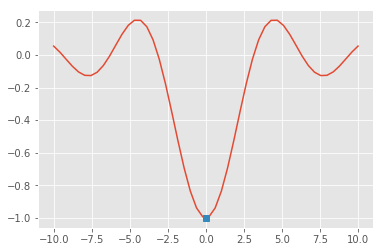

In [53]:
x = np.linspace(-10,10,50)
func = lambda x: -np.sin(x)/x
y = func(x)
plt.plot(x,y)

y_best = func(best['x'])
plt.plot(best['x'], y_best, marker='s')

Нашли)

Возвращаясь к нашим баранам, функция вданном случае будет возвращать метрику качества модели (пайплайна) на кроссвалидации. С помощью `hyperopt` мы будем искать минимум этой функции при заданных диаполознах значений гипер параметров.

Но самым важным плюсом, как по мне, является гибкость - в функцию, которую мы хотим минимизировать можно написать все что угодно. Например, сейчас я добавлю вариативность в пайплайне по типу шкалирования между - StandartScaler или RobustScaler.

In [54]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score

In [69]:
idx_features

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [55]:
X = df_features.loc[:, idx_features].values
y = df_features.loc[:, ~idx_features].values.flatten()

In [61]:
def run_trials_template(X, y, params, evals=100):

    def hyperopt_cv(X, y, params):
        
        X_ = X.copy()
        
        # Отделяем параметры лог регрессии в отдельный словарь
        lm_params = {}
        for k, v in params.items():
            if k.startswith('glob'):
                continue                
            elif k.startswith('lm'):
                lm_params[k.split('_', 1)[1]] = v
        
        # Задаем шкалирование
        if params['scaler_type'] == 'standart':
            scaler = StandardScaler(with_mean=params['scaler_centering'])
        else:
            assert params['scaler_type'] == 'robust'
            scaler = RobustScaler(with_centering=params['scaler_centering'])
        
        # Создаем лог рег с нужными параметрами
        clf = LogisticRegression(**lm_params)
        
        # Итоговый пайплайн
        model = Pipeline([
            ('scaler', scaler),
            ('clf', clf)
        ])

        # Схема кросс-валидации
        n_splits = 5
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, 
                             random_state=RND_SEED)
        scores = cross_val_score(model, X_, y,
                                 scoring='roc_auc', 
                                 cv=cv, 
                                 n_jobs=-1)

        # Возвращаем среднее значение метрики и отклонение (на всякий случай)
        return scores.mean(), scores.std()

    def f(params):
        acc, std = hyperopt_cv(X, y, params)
        return {'loss': -acc, 'qscore': -acc, 'qscore_std': std, 'status': STATUS_OK}

    trials = Trials()
    best = fmin(f, 
                params, 
                algo=tpe.suggest, 
                max_evals=evals, 
                trials=trials, 
                verbose=1)
    
    return trials

In [59]:
# Задаем пространство поиска
space4_lm = {
    'lm_penalty': hp.choice('penalty', ['l1', 'l2']),
    'lm_C': hp.loguniform('C', -5, 3),
    'lm_class_weight': hp.choice('class_weight', [None, 'balanced']),
    'lm_random_state': RND_SEED,
    'scaler_type': hp.choice('scaler_type', ['standart', 'robust']),
    'scaler_centering': hp.choice('scaler_centering', [False, True])
}

In [62]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [65]:
def trials_df(trials):
    '''
    Функция форматирует результаты hyperopt в dataframe
    '''
    tr_dict = []
    for t in trials:
        trial = dict()
        for k, v in t['misc']['vals'].items():
            trial[k] = v[0]

        trial['qscore'] = -t['result']['qscore']
        trial['qscore_std'] = -t['result']['qscore_std']
        tr_dict.append(trial)

    df_res = pd.DataFrame.from_dict(tr_dict)
    df_res = df_res.sort_values('qscore', ascending=False)
    
    return df_res

Достаем результаты.

Стоит оговорится, что в некоторых столбцах указаны не фактические значение гиперпараметров, а их позиция в соответствуюем поле в `space4_lm`

In [66]:
df_trials = trials_df(trials)

Здесь `qscore` - метрика качесва, а `scaler_type = 1` означает, что был выбран `scaler_type = robust`

In [67]:
df_trials.head()

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
24,0.025634,1,0,0.836800,-0.003782,0,1
25,0.024205,1,0,0.836767,-0.003833,0,1
29,0.025661,1,0,0.836743,-0.003664,1,1
23,0.021329,1,0,0.836742,-0.004005,0,1
22,0.020818,1,0,0.836725,-0.004041,0,1


## Ваш черед

### Новые признаки

Задание творческое - придумайте по новому признаку (группе признаков)
* На основе mcc (tr_type)
* На основе временного фактора
* На основе текстов из описания mcc

Реалиуйте их в функции, аналогичной `gen_features`.

In [201]:
def gen_my_features(df_gender, df_transactions):
    
    df_mcc_counts = \
        df_transactions.pivot_table(index=['customer_id'], columns='mcc_code', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_counts = df_mcc_counts.rename(lambda x: 'mcc_{}_count'.format(x), axis=1)

    df_hour_rations = \
        df_transactions.pivot_table(index=['customer_id'], columns='hour', values='amount', 
                             aggfunc=np.size, fill_value=0)

    # Сложная и нетривиальная конструкция
    total = df_hour_rations.sum(axis=1)
    df_hour_rations.loc[:, 'morning'] = (df_hour_rations.loc[:, '05':'11'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'day'] = (df_hour_rations.loc[:, '12':'17'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'evening'] = (df_hour_rations.loc[:, '18':'23'].sum(axis=1).T/total).T
    df_hour_rations.loc[:, 'night'] = (df_hour_rations.loc[:, '00':'04'].sum(axis=1).T/total).T
    
    
    #Income-outcome by month and year - because in an article we saw - Мужчины снимают всё!
    
    df_copy = df_transactions.copy()
    df_copy['YearMonth'] = df_copy['datetime'].map(lambda x: 100*x.year + x.month)
    df_runningTotal =df_copy.groupby(['customer_id', 'YearMonth'] ).apply(lambda x: pd.Series(dict(endOfMonthBalance = x['amount'].sum())))
    df_runningTotal['RunningTotal'] = df_runningTotal.groupby(['customer_id'])['endOfMonthBalance'].cumsum()
    df_pvt = df_runningTotal.pivot_table(values=['RunningTotal'], index='customer_id', columns='YearMonth', aggfunc='first', fill_value =0)
    
    df_tr_type_category = df_transactions.copy()
    df_tr_type_category['category'] = df_tr_type_category.tr_type//1000
    
    df_tr_type_category = \
    df_tr_type_category.pivot_table(index=['customer_id'], columns='category', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_tr_type_category = df_tr_type_category.rename_axis(lambda x: 'category_{}_count'.format(x), axis=1)
    
    df_mcc_code_sub_category = df_transactions.copy()
    df_mcc_code_sub_category['sub_category'] = df_mcc_code_sub_category.tr_type//100
    
    df_mcc_code_sub_category = \
    df_mcc_code_sub_category.pivot_table(index=['customer_id'], columns='sub_category', values='amount', 
                             aggfunc=np.size, fill_value=0)

    df_mcc_code_sub_category = df_mcc_code_sub_category.rename_axis(lambda x: 'sub_category_{}_count'.format(x), axis=1)


    # Объединяем:
    df_features = df_gender.join(df_mcc_counts, on='customer_id', how='left')\
                           .join(df_hour_rations.loc[:, ['morning', 'day', 'evening', 'night']], on='customer_id', how='left')\
                           .join(df_pvt, on='customer_id', how='left')\
                           .join(df_tr_type_category, on='customer_id', how='left')\
                           .join(df_mcc_code_sub_category, on='customer_id', how='left')
    
        
    return df_features

In [202]:
df_my_features = df_gender.pipe(gen_my_features, df_transactions)

In [206]:
df_my_features.head()

,customer_id,gender,mcc_742_count,mcc_1711_count,mcc_1731_count,mcc_1799_count,mcc_2741_count,mcc_3000_count,mcc_3351_count,mcc_3501_count,...,sub_category_24_count,sub_category_40_count,sub_category_41_count,sub_category_42_count,sub_category_45_count,sub_category_60_count,sub_category_61_count,sub_category_62_count,sub_category_70_count,sub_category_81_count
0,75562265,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,47,0
1,10928546,1,0,0,0,0,0,0,0,0,...,0,33,1,0,0,3,1,1,16,0
2,69348468,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
3,84816985,1,0,0,0,0,0,0,0,0,...,1,8,0,0,0,0,1,0,22,0
4,61009479,0,0,0,0,0,0,0,0,0,...,0,31,2,0,0,0,0,0,103,0


In [207]:
label = 'gender'
idx_features = df_my_features.columns != label

In [208]:
X = df_my_features.loc[:, idx_features].values
y = df_my_features.loc[:, ~idx_features].values.flatten()

In [115]:
#df_transactions['YearMonth'] = df_transactions['datetime'].map(lambda x: 100*x.year + x.month)

In [116]:
#df_transactions.head()

,customer_id,mcc_code,tr_type,amount,term_id,day,dt,weekday,datetime,date,hour,YearMonth
0,39026145,4814,1030,-100.0,NaN,0,1406888606,5,2014-08-01 10:23:26,2014-08-01,10,201408
1,39026145,6011,7010,2500.0,NaN,1,1406974769,6,2014-08-02 10:19:29,2014-08-02,10,201408
2,39026145,4829,2330,-2500.0,NaN,1,1406974856,6,2014-08-02 10:20:56,2014-08-02,10,201408
3,39026145,5499,1010,-62.0,NaN,1,1406975994,6,2014-08-02 10:39:54,2014-08-02,10,201408
4,39026145,5499,1010,-41.0,NaN,2,1407080022,7,2014-08-03 15:33:42,2014-08-03,15,201408


In [153]:
#df_runningTotal =df_transactions.groupby(['customer_id', 'YearMonth'] ).apply(lambda x: pd.Series(dict(endOfMonthBalance = x['amount'].sum())))

In [158]:
#df_runningTotal['RunningTotal'] = df_runningTotal.groupby(['customer_id'])['endOfMonthBalance'].cumsum()

In [161]:
#df_income_outcome_pvt = df_runningTotal.pivot_table(values=['RunningTotal'], index='customer_id', columns='YearMonth', aggfunc='first', fill_value =0)

In [180]:
#df_income_outcome_pvt.head()

RunningTotal                                                  \
YearMonth         201408  201409  201410  201411  201412  201501  201502   
customer_id                                                                
6815              105100   95900   79100   63600   45500   31300   28120   
22899              -8900   -5920  -30785  -29131  -27431  -25801  -33453   
27914             -18900  -37700  -56500  -74900  -89900 -111709 -133073   
28753            -102010 -109088 -150305 -343754 -403676 -523189 -545167   
31385              -6511    6812  -32418  -44189  -54647  -62684  -75751   

                                                                              
YearMonth    201503  201504  201505  201506  201507  201508  201509   201510  
customer_id                                                                   
6815          24367   13308    4047  -12212  -16468  -53645  -54446   -55634  
22899        -33023  -24188  -31446  -29372  -29659  -29257  -28913   -28045  
27914       -133053 -133053 -132553 -132553 -132553 -132553 -132553  -132553  
28753       -611117 -836330 -832380 -841012 -821570 -821870 -967369 -1181981  
31385        -86504  -88089  -89090  -90145  -91570  -93553  -96053   -97063

## Поиск гиперпараметров

Реализуйте функцию для hyperopt по перебору гипер параметров вашего пайплайна

На всякий случай почитайте еще про [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) и [пример](http://scikit-learn.org/stable/auto_examples/hetero_feature_union.html#sphx-glr-auto-examples-hetero-feature-union-py)

In [209]:
# Запускаем поиск
trials = run_trials_template(X, y, space4_lm, evals=40)

In [210]:
df_trials = trials_df(trials)

In [211]:
df_trials.head() # a bit better than the score before

,C,class_weight,penalty,qscore,qscore_std,scaler_centering,scaler_type
39,0.026290,0,0,0.840832,-0.003141,1,1
30,0.029883,0,0,0.840792,-0.002955,1,1
26,0.031381,0,0,0.840781,-0.002909,1,1
34,0.031660,0,0,0.840778,-0.002897,1,1
27,0.037256,0,0,0.840648,-0.002791,1,1


In [ ]:
# А это трансформер, который выбирает подможнество столбцов из матрицы X
# Который нужен для того, чтобы делать какие-то действия только для подмноества столбцов, а потом объединять результаты
# Через FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, col_idx):
        self.col_idx = col_idx
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.col_idx]